In [2]:
import pandas as pd
import matplotlib.pylab as myplot
import seaborn as mysb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


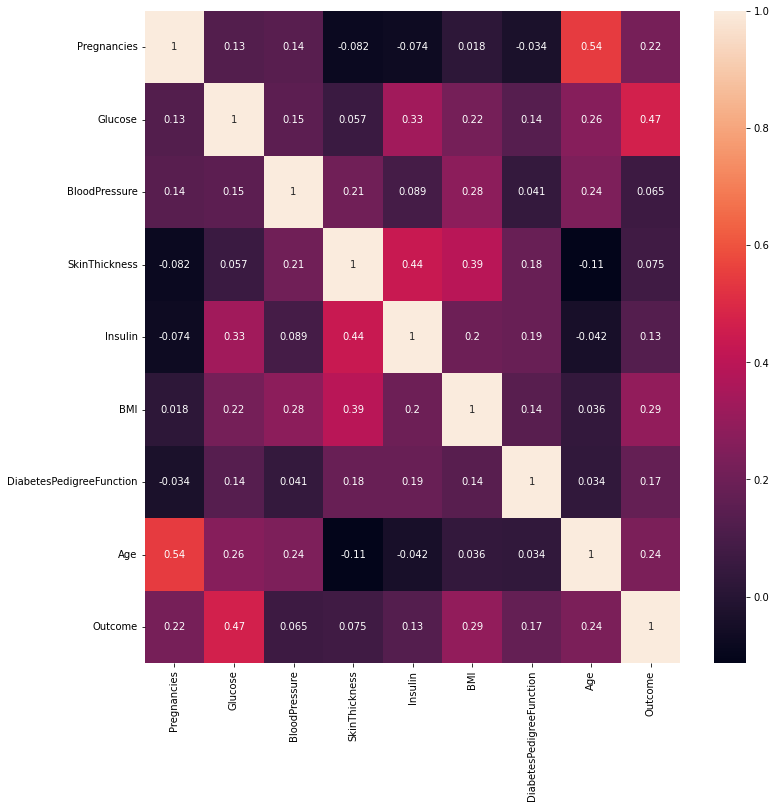

In [3]:
myplot.figure(figsize=[12,12])
mysb.heatmap(df.corr(),annot=True)
myplot.show()

In [5]:
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','DiabetesPedigreeFunction']
x = df[feature_cols]
y = df.Outcome

In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(xtrain,ytrain)

In [9]:
ypred = classifier.predict(xtest)
print(ypred)

[0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1
 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 1 0]


In [11]:
confusion_matrix(ytest,ypred)
print(confusion_matrix(ytest,ypred))

print('Accuracy',metrics.accuracy_score(ytest,ypred))

[[77 22]
 [22 33]]
Accuracy 0.7142857142857143


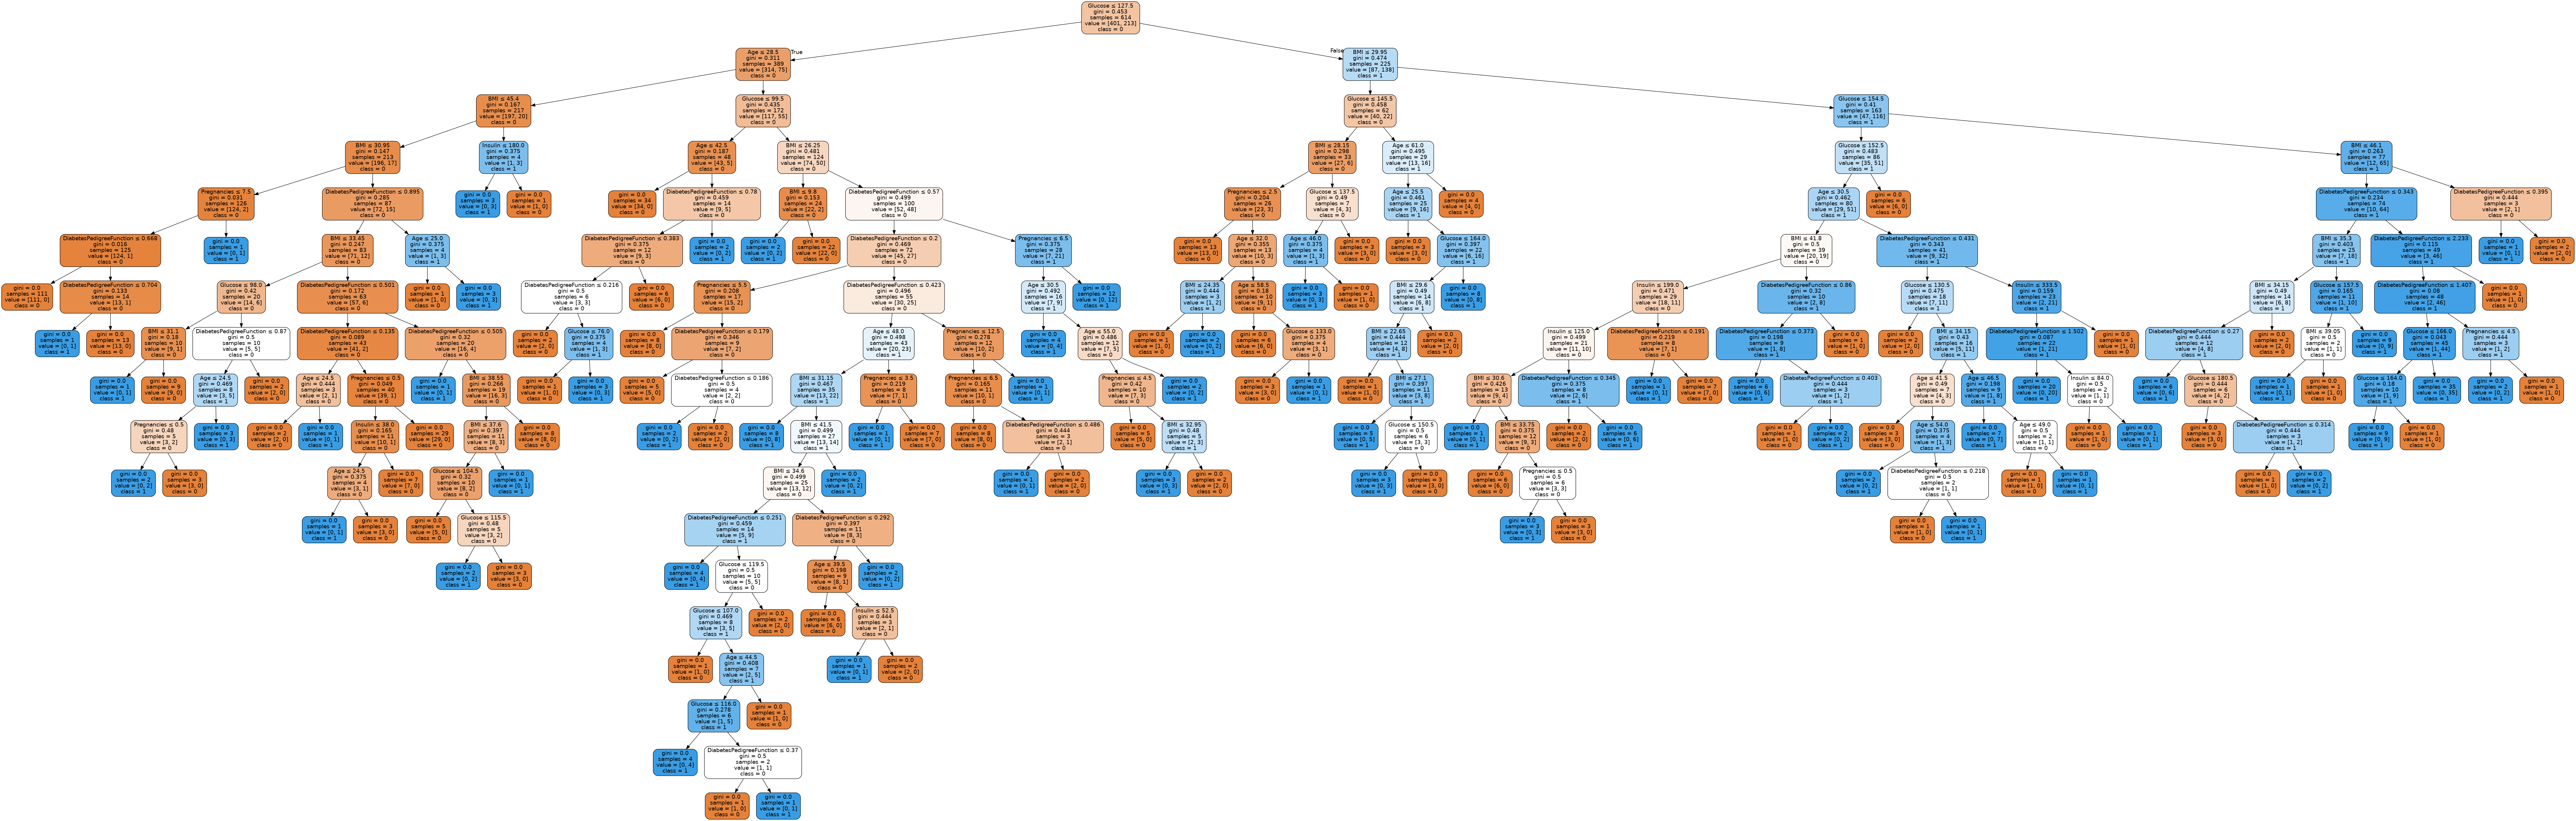

In [23]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names= feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('dia.png')
Image(graph.create_png())